In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=1e-4), # Changed 'lr' to 'learning_rate'
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 457ms/step - acc: 0.5064 - loss: 1.0742 - val_acc: 0.5260 - val_loss: 0.6893
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 476ms/step - acc: 0.6146 - loss: 0.6770 - val_acc: 0.6582 - val_loss: 0.6671
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 444ms/step - acc: 0.7270 - loss: 0.6442 - val_acc: 0.6490 - val_loss: 0.6278
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 439ms/step - acc: 0.7879 - loss: 0.5798 - val_acc: 0.7954 - val_loss: 0.5117
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 450ms/step - acc: 0.8233 - loss: 0.4646 - val_acc: 0.8204 - val_loss: 0.4429
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 447ms/step - acc: 0.8535 - loss: 0.3970 - val_acc: 0.8418 - val_loss: 0.4328
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 445ms/step - acc: 0.8722 - loss: 0.3451 - val_acc: 0.8490 - val_loss: 0.4445
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 460ms/step - acc: 0.8889 - loss: 0.3140 - val_acc: 0.8578 - val_loss: 0.4536
Epoch 9/10
157/157 ━━━━━━━━━━━━━

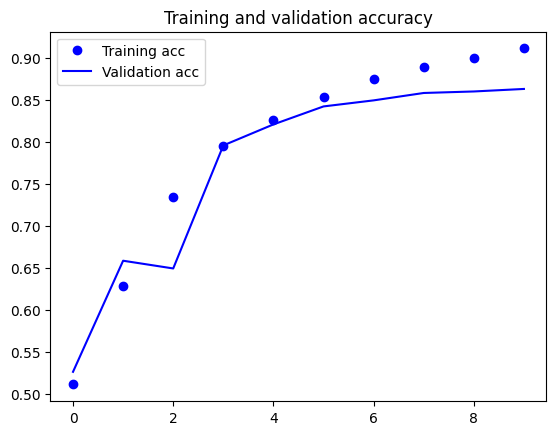

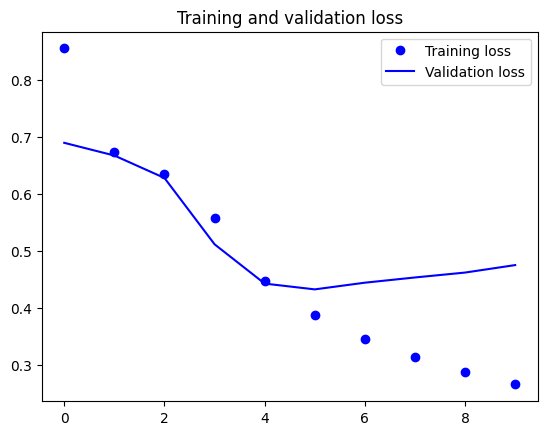

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import os
import numpy as np

data_dir = '/home/ubuntu/data/'
fname = os.path.join(data_dir, '/content/jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
# Replace the line causing the error:
# history = model.fit_generator(train_gen,
#                               steps_per_epoch=500,
#                               epochs=20,
#                               validation_data=val_gen,
#                               validation_steps=val_steps)

# with this line using model.fit:
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 74ms/step - loss: 0.4719 - val_loss: 0.4221
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - loss: 0.3733 - val_loss: 0.4244
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - loss: 0.3428 - val_loss: 0.4337
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - loss: 0.3244 - val_loss: 0.4368
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - loss: 0.3084 - val_loss: 0.4352
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - loss: 0.3022 - val_loss: 0.4450
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - loss: 0.2903 - val_loss: 0.4448
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - loss: 0.2859 - val_loss: 0.4583
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - loss: 0.2805 - val_loss: 0.4377
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - loss: 0.2736 - val_loss: 0.4441
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - loss: 0.2682 - val_loss: 0.4528
Epoch 12/20
500/500 ━━━━━━━━━━

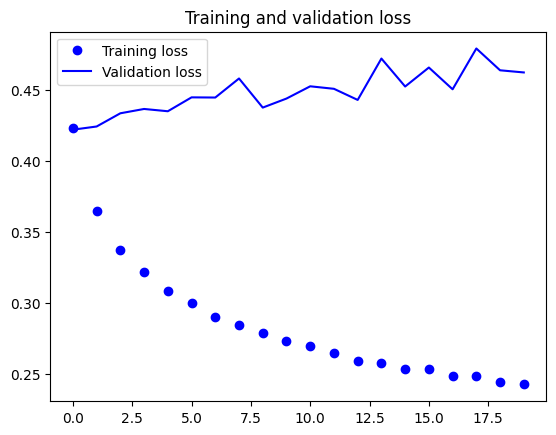

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
step = 3
lookback = 720  # Unchanged
delay = 144 # Unchanged

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [ ]:
# Replace this line:
# history = model.fit_generator(train_gen,
#                               steps_per_epoch=500,
#                               epochs=20,
#                               validation_data=val_gen,
#                               validation_steps=val_steps)

# With this line, using model.fit:
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 144ms/step - loss: 2373050382583595008.0000 - val_loss: 0.7673
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 73s 146ms/step - loss: 2540983.7500 - val_loss: 0.7621
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 142ms/step - loss: 2440101376.0000 - val_loss: 0.7636
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 143ms/step - loss: 111530120.0000 - val_loss: 0.7632
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - loss: 4088608512.0000 - val_loss: 0.7536
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 149ms/step - loss: 268048416768.0000 - val_loss: 0.7429
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 73s 146ms/step - loss: 9482269696.0000 - val_loss: 0.7512
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 143ms/step - loss: 544004702208.0000 - val_loss: 0.7407
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - loss: 6085563392.0000 - val_loss: 0.7373
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 72s 143ms/step - loss: 85690628964352.0000 - val_loss: 0.7452
Epoch 

In [ ]:
import os
import shutil

def save_project_files(directory):
    """Saves the project files to the specified directory."""

    # List of files to save (modify as needed)
    files_to_save = ['IMDB.ipynb']  # Replace with the actual filenames

    # Check if directory exists, otherwise create it
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Iterate over the files to save
    for file_name in files_to_save:
        # Check if the file exists
        if os.path.exists(file_name):
            # Construct the full path in the target directory
            destination_path = os.path.join(directory, file_name)

            # Copy the file to the destination
            shutil.copy(file_name, destination_path)
            print(f"File '{file_name}' copied to '{directory}'") # Corrected f-string
        else:
            print(f"Warning: File '{file_name}' not found!")

# Example usage:
project_directory = '/content/my_project_folder'  # Specify the desired directory

save_project_files(project_directory)

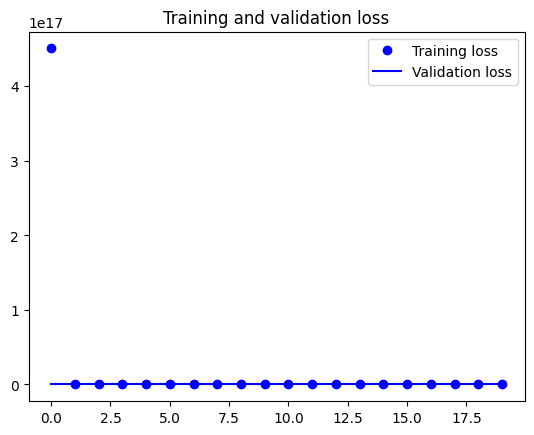

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# New section

# New section